In [1]:
import gym
from gym import spaces
import numpy as np
from numpy import random
import seaborn
import time
import matplotlib.pyplot as plt
import time

# PART I: Define the Environment

The environment that we defined is called "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid traps, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains the +5 gold coin
+ 0.4 if the cell contains the +4 gold coin
+ 0.2 if the cell contains the -7 trap
+ 0.1 if the cell contains the -6 trap

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +20 if the agent reaches the target goal position
- +5 or +4 if the agent reaches the respective gold coins
- -7 or -6 if the agent enters the respective trap

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [2]:
class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, timestep):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = timestep
        
        
    def step(self, action):

        #self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.5
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        self.state[tuple(self.agent_pos)] = 1.0
        observation = self.state.flatten()
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given big reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)

        elif (self.agent_pos == self.trap1_pos).all():
            reward = -7 #A negative reward of -7 if it enters trap

        elif (self.agent_pos == self.trap2_pos).all():
            reward = -6 #A negative reward of -6 if it enters trap
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #Reward of +5
            self.coin1_pos = [-1,-1]  #removes the coin once collected

        elif (self.agent_pos == self.coin2_pos).all():
            reward = +4 #Reward of +4
            self.coin2_pos = [-1,-1]  #removes the coin once collected

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.trap1_pos = [2,0]
        self.trap2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.4
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [3]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

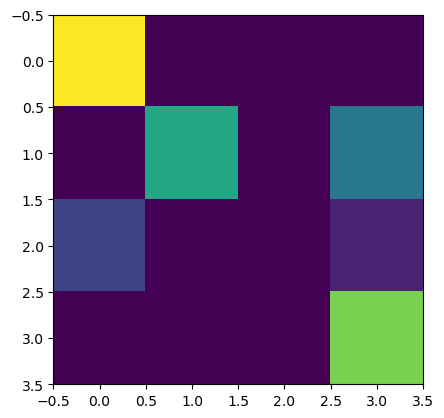

In [4]:
envview = GameEnv(5)
envview.reset()
envview.render()

Step 1
Current state:
 [[1.  0.  0.  0. ]
 [0.  0.6 0.  0.4]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 2
Current state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  1 (Up)
New state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 3
Current state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  0.  1.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 4
Current state:
 [[0.  0.  1.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  0.  0.  1. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 5
Current state:
 [[0.  0.  0.  1. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0

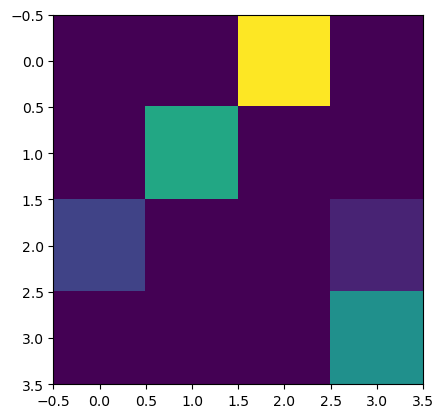

In [5]:
#Test the environment is working
timestep=10

envtest = GameEnv(timestep)
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Current state:\n", envtest.state)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("New state:\n", envtest.state)
    print("Reward: ", reward,'\n')
    envtest.render()
if(envtest.agent_pos == envtest.goal_pos).all():
    print("Terminal state reached!")
print("Total Reward:", rwd)


# PART 2 Step 1: Implementating SARSA

In [6]:
## functions ##

#Define epsilon-greedy function
def greedyEp(state, Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        act = np.random.choice(env.action_space.n)
    else:
        act = np.argmax(Q[np.where(state==1)[0][0]][:])
    return act


#Define SARSA
def SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay):
    
    #define parameters to track reward, loss, average steps for plots
    total_reward =[]
    s_a_loss=[]
    step_count=0
    avg_steps=[]
    step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}


    #Initializing the Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    old_Q = Q
    
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        avg_loss=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            #Calculating new Q value at this state-action pair
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * Q[np.where(next_state==1)[0][0]][next_action]
            loss=alpha*(target - prediction)
            avg_loss += loss
            Q[np.where(state==1)[0][0]][action] = (Q[np.where(state==1)[0][0]][action] + loss)
            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward

            #Decrease epsilon using negative exponential function
            if epsilon > 0.01:
                epsilon =np.exp(-decay*(episode+1))

        #track data for plots
        step_count += step
        total_reward.append(ep_reward)
        s_a_loss.append(avg_loss/timestep)
        
        #print current Q-table every 100 episodes
        if (episode%100==99):
            avg_steps.append(step_count/100)
            step_count=0
            print("Episode",episode+1,"/",total_episodes,"complete")
            print("Current Q-table:\n", Q,"\n")
    
    #When all episodes are complete
    print("Done!")
    return Q, total_reward, s_a_loss, avg_steps

In [42]:
#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)
print(decay)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running SARSA
Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

0.003070113457325394
Episode 100 / 2000 complete
Current Q-table:
 [[ 1.75574074e-02  1.59551214e-02  8.38839362e-01  9.78764052e-02]
 [ 2.53683217e+00  5.22370537e-01  2.43209749e-01  5.67205577e-02]
 [ 6.52129478e-01  9.60453512e-02  3.49827705e-01  4.71971401e-01]
 [ 1.04640091e+00  3.15642468e-01  2.69873534e-01  1.51279157e-01]
 [-6.20494089e+00  4.13844454e-02  2.38875064e+00 -1.84672424e-01]
 [-1.96395045e-01  6.40144998e-01  8.85543643e-01  7.11626944e-03]
 [ 1.72616942e-01  2.46579714e-01  1.94998112e+00  9.11429412e-01]
 [-1.34608404e+00  2.36048223e-01 -2.54396270e-01  6.02295009e-01]
 [-5.20072769e-01 -2.49641450e-01 -3.53941335e-02 -4.60629261e+00]
 [ 1.23552326e-01  9.50827818e-01  3.89058351e-02 -4.32667162e+00]
 [ 2.57642664e+00  4.29445918e-01 -3.04980078e+00 -2.07963334e-01]
 [ 1.52434623e+01  3.58630272e-01 -1.39913337e-01 -2.04434768e-01]
 [-4.26699696e-01 -4.44484026e+00  3.20866981e-01 -1.44263308e-01]
 [ 1.59556020e-01 -2.52455684e-02  1.73901241e+00 -2.36468576e

Episode 1000 / 2000 complete
Current Q-table:
 [[ 5.20256322  7.2224011  14.49931366  7.10884737]
 [16.9405933   9.93638813  5.8875046   6.44889353]
 [10.8882415   1.28295452  1.22828729  2.35485687]
 [ 3.82323544  0.50622275  0.39033749  0.78338488]
 [-6.54361949  1.9626546  12.04395933  0.79294762]
 [ 8.59047428  9.07699833 13.89577802  5.24139832]
 [15.72675124  4.9602976   6.91163937  8.4525828 ]
 [ 2.34107537  0.79020215  1.07182166  8.41988194]
 [-0.76974011 -0.14551428  3.5478981  -5.28344069]
 [13.84946367  2.83600793  3.52222154 -5.88758442]
 [17.96159463  8.61440614  9.66764056  6.12308872]
 [19.8389173   1.35965557  1.08900571  2.15868761]
 [-0.48614285 -5.75299616  3.9693993  -0.12495665]
 [ 5.54036076  1.39342065 17.52959522  0.59548373]
 [15.0880686  12.88878385 20.         10.12614655]
 [ 0.          0.          0.          0.        ]] 

Episode 1100 / 2000 complete
Current Q-table:
 [[ 5.20256322  7.2224011  15.32223943  7.10884737]
 [17.54492446  9.93638813  5.8875046

Episode 2000 / 2000 complete
Current Q-table:
 [[ 5.76967062  8.20504225 16.13181171  7.80379851]
 [17.96847161 10.51730526  6.66903902  8.20214425]
 [11.94481422  1.28295452  1.22828729  2.35485687]
 [ 4.03761039  0.50622275  0.39033749  0.78338488]
 [-6.54361949  1.9626546  12.709961    0.79294762]
 [ 9.39990996 11.37286182 14.41965379  6.34907179]
 [16.07611921  5.73884606  7.85371476  8.87946919]
 [ 2.34107537  0.92273764  1.07182166  9.5407103 ]
 [-0.76974011 -0.14551428  3.5478981  -5.28344069]
 [14.59163652  2.83600793  3.52222154 -5.88758442]
 [17.95049687  9.41530172 10.25184795  7.87344671]
 [19.88158942  1.35965557  1.08900571  2.15868761]
 [-0.48614285 -5.75299616  3.9693993  -0.12495665]
 [ 5.54036076  1.39342065 17.39798488  0.59548373]
 [15.62821367 13.60543788 20.         11.17290745]
 [ 0.          0.          0.          0.        ]] 

Done!


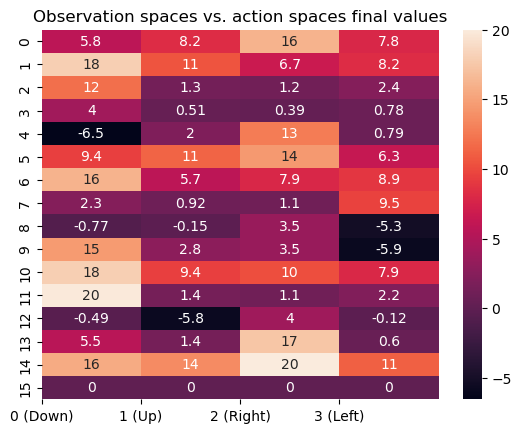

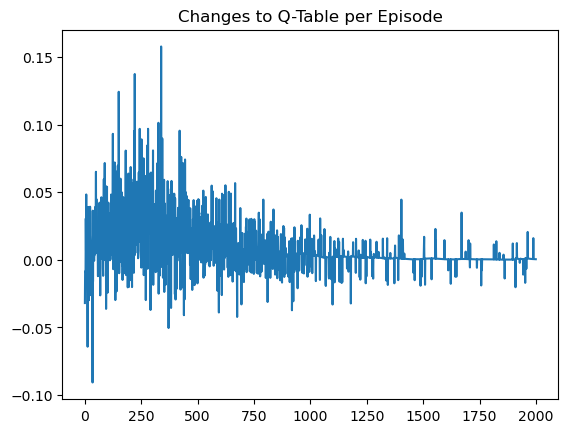

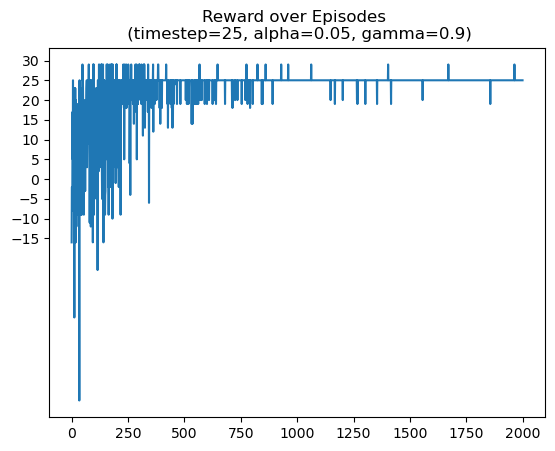

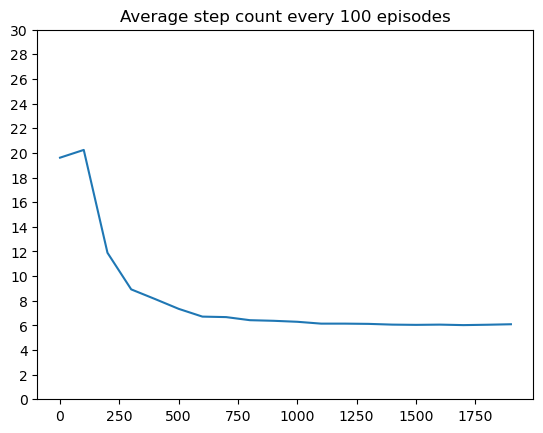

In [43]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()

plt.plot(reward)
plt.title(f'Reward over Episodes \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [44]:
#Evaluation function to test that policy has converged     

def evaluate(env, Q, timestep, total_episodes, epsilon):
    tot_r = []
    tot_s = []
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward


        tot_s.append(step)
        tot_r.append(ep_reward)
  
    #When all episodes are complete
    print("Done!")
    return tot_r, tot_s

Done!


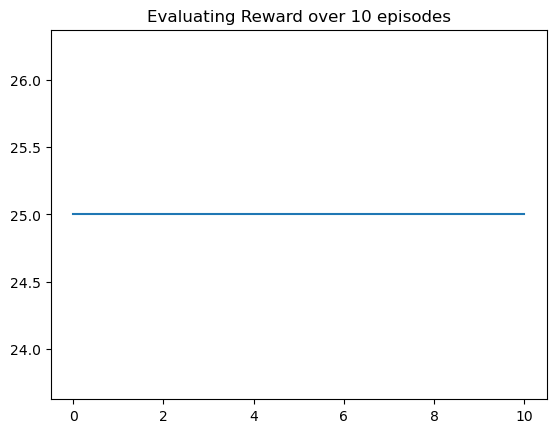

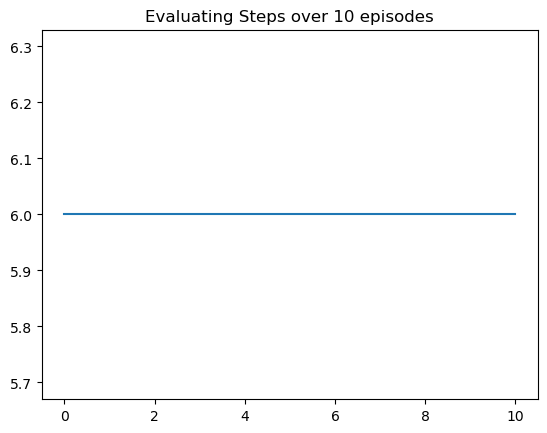

In [45]:
Qpi = Q
timestep=25
total_episodes = 11
epsilon = 0 #ensures greedy action is taken 100% of the time

step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

env = GameEnv(timestep)
env.reset()

reward, steps = evaluate(env, Qpi, timestep, total_episodes, epsilon)

plt.plot(reward)
plt.title(f'Evaluating Reward over 10 episodes')
plt.show()
plt.plot(steps)
plt.title("Evaluating Steps over 10 episodes")
plt.show()

# PART 2 Step 2: Parameter Tuning for SARSA

**Parameter #1: Number of Max Timesteps**

Default in base SARSA algorithm was 25 timesteps. Decreasing the timesteps will improve runtime; we will see if we can still maintain good convergence while lowering the max timestep. 

In [11]:
#Max Timesteps: 20 timesteps

#define parameters
timestep=20
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-6.68692066e-01  2.81132173e-01  9.12733067e-01  2.63049929e-01]
 [ 2.84297744e+00  6.21007267e-01  4.32616351e-01  2.48035215e-01]
 [ 3.22952615e-01  2.30548217e-01  2.32758356e-01  7.98782884e-01]
 [ 1.11151552e+00  1.05756303e-01  1.00910627e-01  1.02815122e-01]
 [-6.48183516e+00  2.74099639e-01  1.88952503e+00 -1.96834373e-01]
 [-1.03413325e+00  1.31064030e+00  4.36236336e-01 -8.20910650e-01]
 [-8.80875541e-02  1.53309069e-01  1.77989525e+00  3.22076775e-01]
 [-2.26564042e+00  1.44410986e-01 -2.17797881e-01  4.73061328e-01]
 [-3.30135162e-01 -7.32073542e-01 -1.15518960e-01 -4.53885053e+00]
 [ 1.19667862e-01  6.12736862e-01  1.34827217e-01 -5.51459591e+00]
 [ 1.75280928e+00  1.01364160e-01 -1.87344535e+00  7.09690365e-02]
 [ 9.19279825e+00  2.74001230e-01 -1.43671584e+00  4.49214288e-02]
 [-1.31193313e-01 -2.28448914e+00  1.51525594e-01 -2.97824519e-01]
 [-4.92182682e-02 -5.43646576e-01  1.68717145e+00 -1.38473839e-01]
 [ 9.05760923e-0

Episode 1300 / 2000 complete
Current Q-table:
 [[ 6.52708401  7.75176066 15.86166154  7.80052339]
 [17.77345239 10.44580364  4.31321383  7.79260874]
 [ 1.50847207  1.3219311   1.37054548  9.73333039]
 [ 2.81066495  0.24563412  0.3693788   0.82687123]
 [-6.34186185  1.83760321 13.01305731  1.34420186]
 [14.24363238  8.66417824  3.50763116  5.29820379]
 [ 2.91200225  1.38133445  3.27490205  7.02157811]
 [ 2.41546391  1.33165382  0.88470594  2.77315393]
 [ 0.75827076 -0.4156424   9.54998671 -5.42057983]
 [16.1218952   6.48716756  9.2053605  -3.20278808]
 [15.77610581  0.8409554   0.94168404  2.40589984]
 [18.01119486  0.57017168 -1.18529987  0.91565986]
 [ 0.2824308  -3.60783828 11.74441375  0.77014391]
 [ 9.90406149  8.65856415 17.97040676  5.54125937]
 [13.19095964  8.97512519 20.          9.29430916]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[ 6.52708401  7.75176066 15.83317055  8.12040518]
 [17.5376277  10.73231324  4.3132138

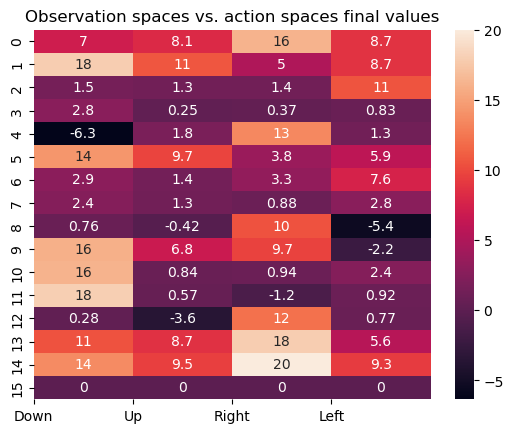

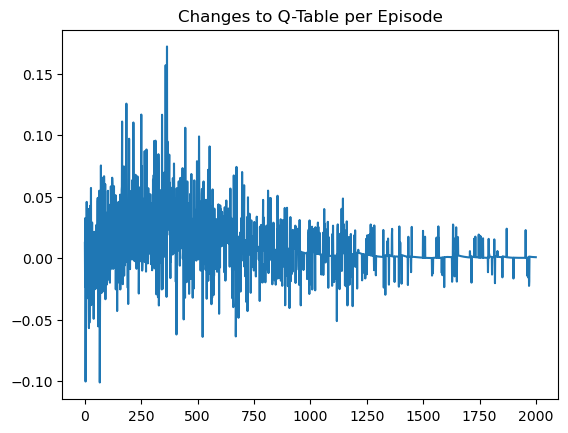

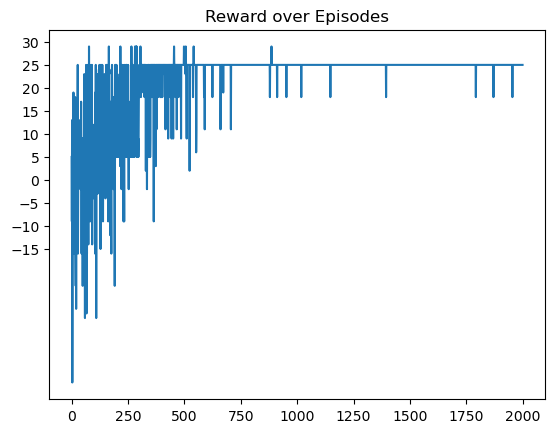

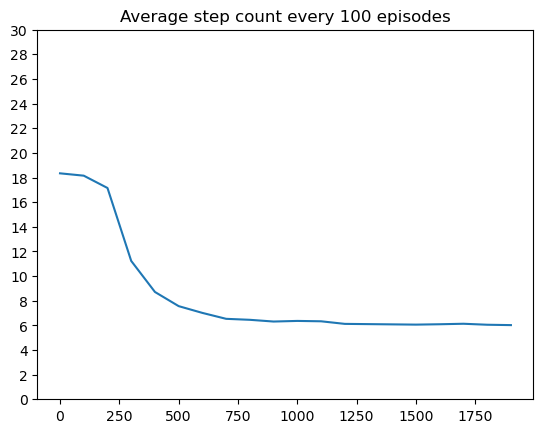

In [12]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [14]:
#Max Timesteps: 15

#define parameters
timestep=15
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.76738619e-01  1.66105309e-01  1.20586235e+00  3.39441145e-01]
 [ 3.56016525e+00  6.11921330e-01  1.89252435e-01  1.08767261e-01]
 [ 7.31859997e-01  5.77345438e-02  2.48506544e-01  2.34615806e-01]
 [ 5.65332805e-01  1.28956916e-01  8.97106439e-02  9.61999464e-02]
 [-5.57638691e+00  1.19116939e-01  2.57339998e+00 -9.47312830e-02]
 [-1.17809236e-01  7.04104449e-01  1.05281120e+00 -8.54600955e-01]
 [-2.22122336e-01  1.10070401e-01  2.29414733e+00  1.51962815e+00]
 [-1.64067361e+00  9.56256994e-02 -1.53136747e-01  9.44801151e-01]
 [-1.15944882e-01 -1.27521362e-01 -4.03813785e-01 -2.85589604e+00]
 [ 1.02063071e-02  6.27146497e-01 -2.23120673e-02 -4.26357731e+00]
 [ 7.98697013e-01  7.86812169e-02 -1.77774195e+00 -4.23998003e-01]
 [ 1.02465004e+01  4.01430205e-01 -4.80495083e-01 -2.02882839e-02]
 [-6.48339218e-02 -2.25649887e+00  3.43928550e-02 -7.31143675e-02]
 [-1.91698645e-02 -1.06554682e-01  7.17608073e-01 -2.12504781e-01]
 [ 4.50000000e-0

Episode 1100 / 2000 complete
Current Q-table:
 [[ 3.73204545  6.60579512 15.65685018  6.44987391]
 [17.47541713  8.25593137  4.70955428  7.2036328 ]
 [ 9.87250038  1.56745228  1.60169388  2.00295757]
 [ 4.44142453  0.37248003  0.30940269  0.51075893]
 [-6.82189636  2.3197074  10.57473395  0.75620615]
 [ 3.20101782  7.73294217 13.74177045  5.35282473]
 [15.2799458   4.1425679   7.34130595  7.4047656 ]
 [ 2.7008859   0.71890463  1.56527788  8.87851468]
 [-0.16788183  0.78725173 -0.04630637 -4.05144259]
 [ 2.57242332  8.85413177  2.99555092 -5.87026288]
 [17.89317312  7.38985425  4.83537944  3.53963256]
 [19.0301095   0.89034822  0.24201066  1.93303514]
 [-0.1885844  -3.23426656  0.84965372 -0.07311437]
 [ 1.28025131  0.61056815 13.60203347 -0.24796415]
 [13.06294615 10.03318693 20.          5.77879702]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 3.73204545  6.96558242 15.58567701  7.1825823 ]
 [17.29114941  8.62380889  4.9278515

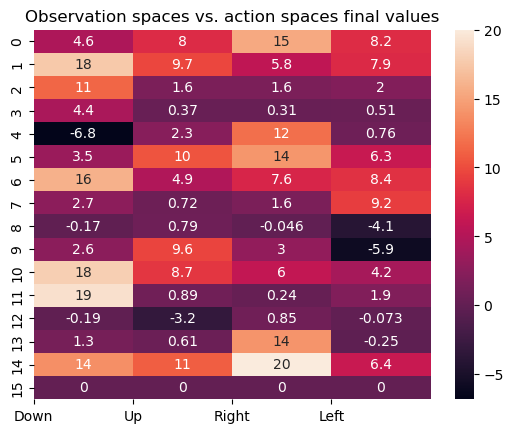

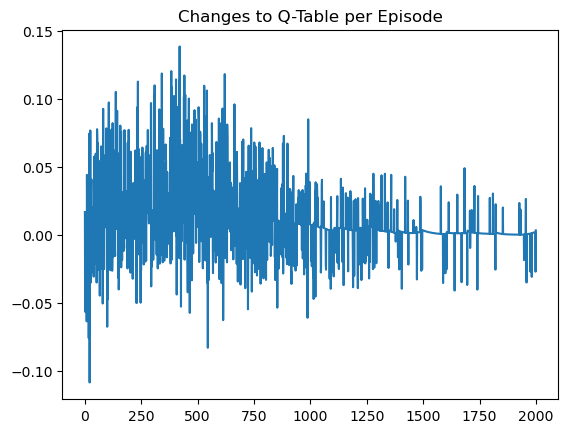

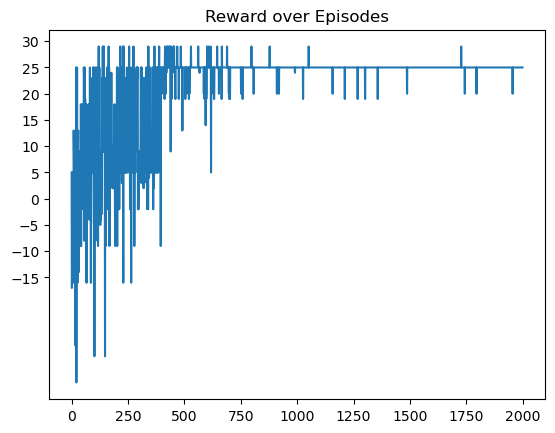

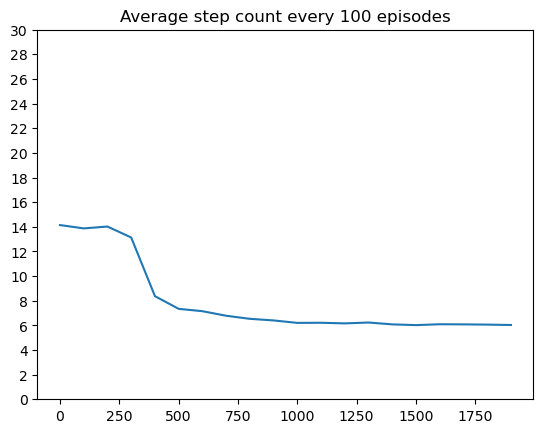

In [15]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [16]:
#Max Timesteps: 10 timesteps

#define parameters
timestep=10
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.36292712e-02  3.33896216e-01  1.13994450e+00  2.86320684e-01]
 [ 3.36316478e+00  9.55573208e-01  7.13769325e-02  2.23397765e-01]
 [ 3.96023709e-01  2.37050454e-02  9.00000000e-03  1.14495208e-01]
 [ 3.70500000e-01  0.00000000e+00  0.00000000e+00  9.52782190e-03]
 [-5.20999099e+00  1.97894052e-01  2.21670753e+00 -3.80208284e-01]
 [-2.29645808e-01  1.13377204e+00  3.83724817e-01  4.26111570e-01]
 [ 6.21119048e-03  1.48057089e-02  8.81867238e-01  1.43390909e+00]
 [-9.91033875e-01  1.66725000e-02  0.00000000e+00  0.00000000e+00]
 [-1.94366547e-01 -3.88712828e-01  6.26134664e-02 -3.11333230e+00]
 [ 8.69320758e-04  5.79991900e-01 -2.79087502e-02 -2.81897021e+00]
 [ 1.26405204e-01  7.06107226e-02 -1.09665000e+00  2.76631925e-02]
 [ 3.70987500e+00  2.00000000e-01 -5.40000000e-01  0.00000000e+00]
 [-4.95780757e-02 -1.86006354e+00  4.99616091e-03  0.00000000e+00]
 [ 1.18499625e-03  8.62777287e-02  0.00000000e+00  2.89496104e-04]
 [ 0.00000000e+0

Episode 1000 / 2000 complete
Current Q-table:
 [[ 3.31128910e+00  3.12766521e+00  4.52359090e+00  3.10022188e+00]
 [ 5.12902913e+00  4.59789554e+00  3.13186638e+00  3.75428298e+00]
 [ 4.29349462e+00  6.08935150e-01  1.14909395e+00  1.62230782e+00]
 [ 3.47728897e+00  9.39858606e-02  2.64406961e-01  2.41235041e-01]
 [-6.61512165e+00  1.01600999e+00  5.19626164e+00  7.46844196e-01]
 [ 2.79971052e+00  4.62079563e+00  4.11947943e+00  4.15063160e+00]
 [ 2.62877990e+00  1.12582542e+00  5.72563740e+00  3.43042726e+00]
 [ 6.47207431e-01  1.05242812e+00  4.92519486e-01  4.78120145e+00]
 [-3.62148663e-01  2.89334865e-01  8.58424629e-01 -4.47454453e+00]
 [ 5.57721519e-02  3.96260749e+00  1.29473905e+00 -5.69152879e+00]
 [ 7.42460089e+00  7.67140577e-01 -6.09388048e-01 -2.52087470e-01]
 [ 1.28302816e+01  3.52503073e-01 -4.55558609e-01  1.73587212e-02]
 [-1.12627512e-01 -2.75610213e+00  2.46627720e-02 -8.75197596e-03]
 [ 9.85840451e-04  5.09895820e-01  0.00000000e+00 -1.06003276e-03]
 [-2.14342626e-

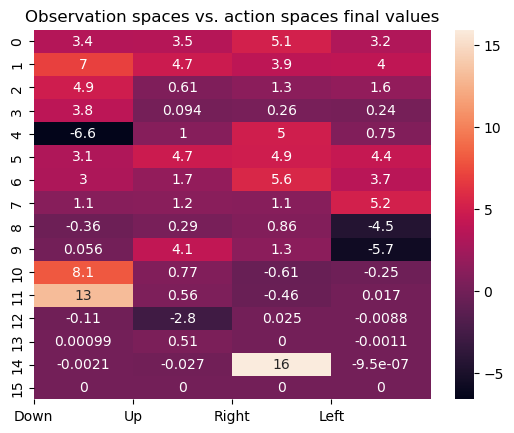

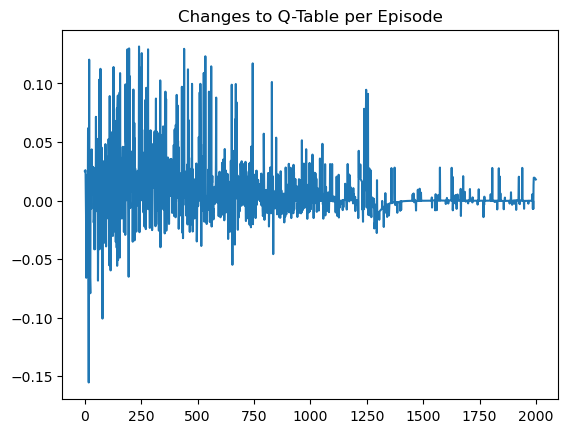

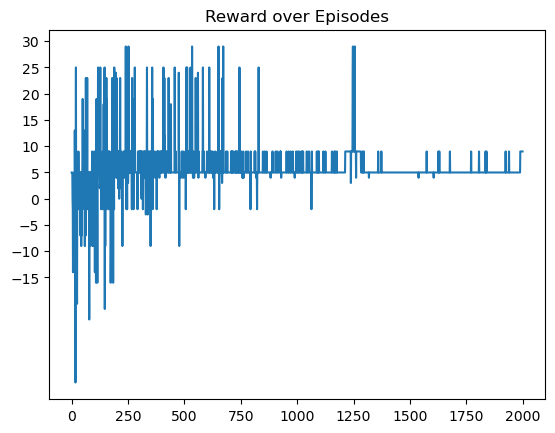

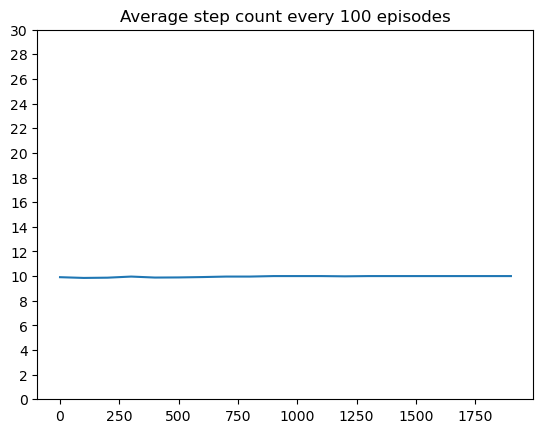

In [17]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

**Parameter #2: Value of Gamma**
With an initial gamma value of 0.9, the base SARSA algorithm seems to have deemed the smallest reward on the map, +4 in the corner at [1,3], is not worth the depreciating rewards compared to collecting the +5 reward in the middle of the map and then heading straight to the terminating state. We will adjust the gamma value to 1.0 to see if the agent will now collect all rewards.

In [18]:
#Gamma = 1 (all rewards equal value)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 1
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-9.90491797e-01  4.41819840e-01  1.44707052e+00  5.68904506e-01]
 [ 2.44578849e+00  1.28562798e+00  3.25845277e-01  6.99724534e-01]
 [ 3.67685387e-01  3.78352186e-01  5.05162550e-01  8.85252297e-01]
 [ 1.25557239e+00  4.11589727e-01  3.74094042e-01  9.50855685e-02]
 [-6.86757220e+00  3.03982794e-01  1.82219482e+00 -7.66378115e-01]
 [-1.74365052e-01  1.15708036e+00  5.42773718e-01 -9.29435173e-03]
 [ 1.81103668e-02  3.86170135e-01  1.25921108e+00  5.48547921e-01]
 [-2.49761085e+00  4.48571628e-01 -1.46524106e-01  4.89463190e-01]
 [-4.78616491e-01 -1.20704705e-01 -8.58637617e-02 -5.28045967e+00]
 [ 8.11068661e-02  1.09170332e+00  7.52302930e-02 -4.84137174e+00]
 [ 2.33756807e+00  2.65459453e-01 -2.79144641e+00  1.42944729e-01]
 [ 1.11974666e+01  5.59363362e-01 -2.13464905e+00 -3.07988684e-01]
 [-1.85720825e-01 -3.89105332e+00 -1.51507605e-02 -3.82243426e-01]
 [ 3.17508980e-02 -1.98998683e-01  1.41519143e+00 -4.79770069e-02]
 [ 3.05601617e-0

Episode 1300 / 2000 complete
Current Q-table:
 [[ 8.25454725 14.08384496 24.24453213 14.81931432]
 [24.31114676 14.9383472  12.8115442  16.7562282 ]
 [ 3.7455034   2.83541953  1.63480265 20.33444551]
 [ 4.93757883  0.63281664  0.56302448  0.57739089]
 [-6.8489003   2.13366283 16.92997994  2.24593574]
 [11.54323857 16.26172118 19.79024734  9.93145838]
 [19.90383341 12.26415183 13.15642104 14.32655214]
 [ 3.9914045   1.53115535  2.62535188 15.53743279]
 [-0.16258308  4.65752519 -0.06949454 -6.25491824]
 [ 3.95678097  4.157569   17.65889729 -5.96550018]
 [19.96706605 14.27312998 10.71405219 12.87261423]
 [19.74441436  2.40355797  0.65135     4.23356766]
 [ 0.19169048 -4.30420141  3.99769736 -0.27515463]
 [ 3.94849282 -0.21332712 18.17114102  0.55590067]
 [17.32550416 14.07512332 20.         13.30710516]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[ 8.25454725 14.60981543 24.4531151  15.30122352]
 [24.33621837 14.9383472  12.8115442

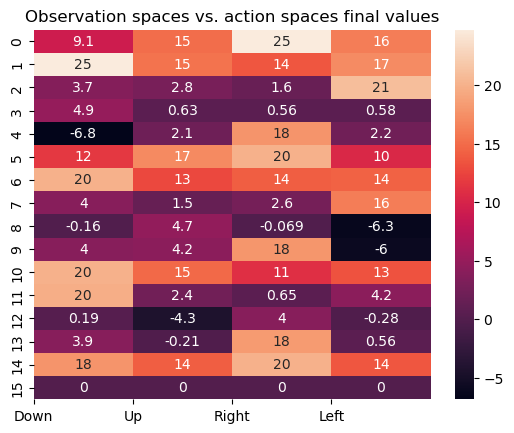

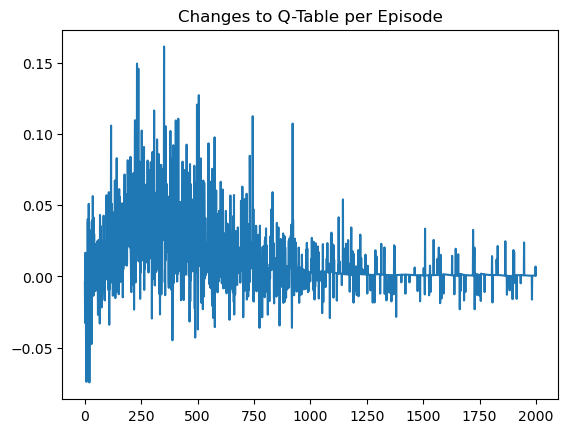

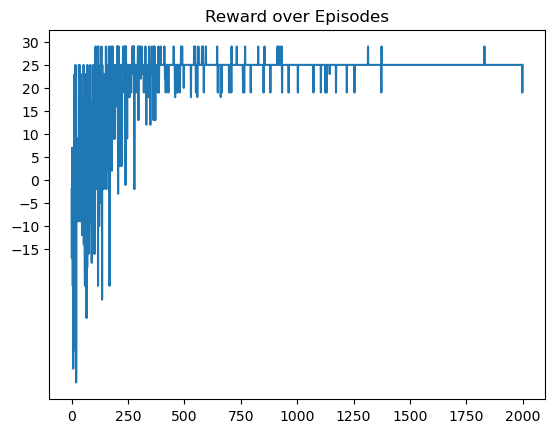

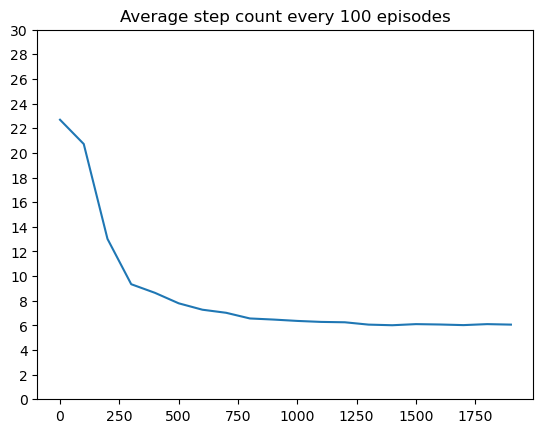

In [19]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [20]:
#Gamma = 0.7

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.7
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 2.11817010e-01  1.80845747e-01  9.42387013e-01  3.36843629e-01]
 [ 2.57335388e+00  6.93589077e-01  2.70484644e-01  3.28581179e-01]
 [ 4.19312301e-01  1.94350320e-01  1.92376388e-01  5.80597299e-01]
 [ 1.34965436e+00  1.75685095e-01  2.45961985e-01  9.54964523e-02]
 [-5.11207086e+00  1.68581548e-01  2.03536482e+00  1.74540395e-01]
 [-5.92541896e-01  8.53317472e-01  6.60621406e-01  1.94090431e-01]
 [ 1.21919056e-02  1.88329152e-01  1.94236664e+00  6.09869509e-01]
 [-2.20093394e+00  1.69013401e-01 -4.56089548e-01  5.63055092e-01]
 [-1.39966009e-01 -4.44227727e-01 -2.93192251e-01 -5.15896678e+00]
 [ 2.73185126e-01  5.33038364e-01 -7.48827134e-02 -4.91291631e+00]
 [ 2.37231373e+00  1.32763168e-01 -3.23890360e+00 -1.88007550e-01]
 [ 1.16375933e+01  1.80363685e-01 -1.77065381e+00 -1.76618884e-01]
 [-3.69638044e-01 -4.55475927e+00  3.41654996e-01 -2.82327886e-01]
 [ 1.69741860e-02  1.12763172e-03  2.61817188e+00 -6.85441445e-01]
 [ 2.95234533e+0

Episode 1400 / 2000 complete
Current Q-table:
 [[ 1.66218089  2.72527519  6.72730327  2.66374026]
 [ 9.59154163  4.44255172  1.91022708  2.79865559]
 [ 1.49462476  0.68540136  0.83421359  4.2678816 ]
 [ 2.34942282  0.46674418  0.58588196  0.31236372]
 [-7.41535321  0.73682082  5.69357461  0.40557778]
 [ 6.71833354  4.62832064  2.96223949  1.86435663]
 [ 7.03818309  0.51254135  2.55412866  1.41133576]
 [-0.27417587  0.82712799  0.18510688  1.5224009 ]
 [-0.19196527  0.10028732  4.52599568 -6.17124726]
 [ 9.47333827  2.69300969  6.90060057 -5.36235083]
 [13.37024858  0.93223362 -0.45940607  1.01066832]
 [18.8092289   0.40954746 -0.86482354  1.10175092]
 [-0.07840811 -5.12007852  7.28623373 -0.24450635]
 [ 6.96230828  4.87983494 13.89262615  2.84432822]
 [11.7670129   6.29357229 20.          7.07369929]
 [ 0.          0.          0.          0.        ]] 

Episode 1500 / 2000 complete
Current Q-table:
 [[ 1.66218089  2.72527519  6.65980986  2.66374026]
 [ 9.48904143  4.44255172  1.9102270

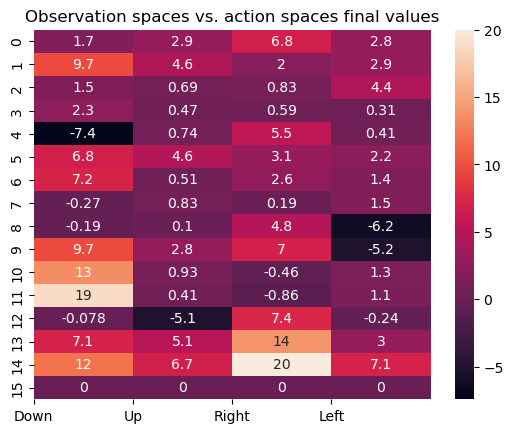

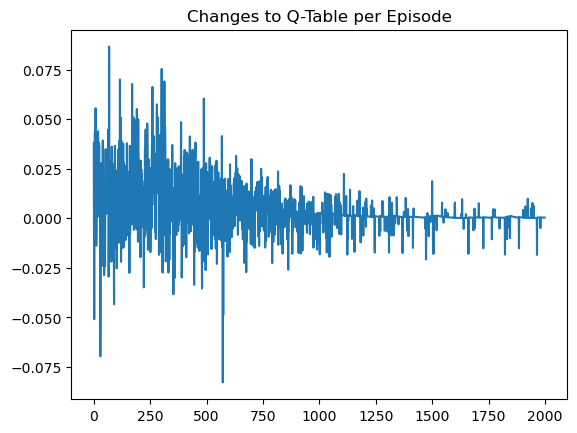

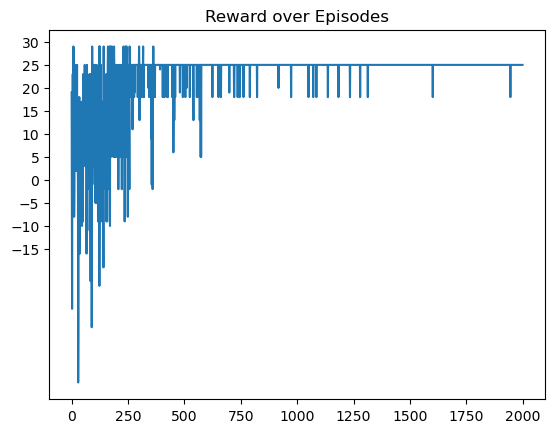

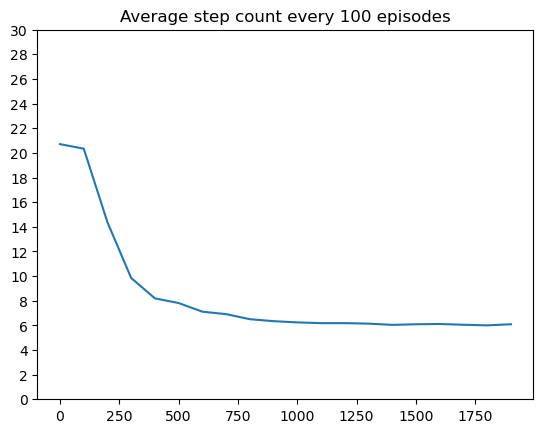

In [21]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [22]:
#Gamma = 0.5 (extremely discounted rewards)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.5
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-6.08963182e-02  4.46006339e-02  5.48829666e-01  3.92399762e-02]
 [ 2.13910652e+00  2.84511368e-01  4.53515890e-02  4.12734887e-02]
 [ 3.73856710e-01  4.77898041e-02  4.23061588e-02  1.42500897e-01]
 [ 1.04919464e+00  4.44816367e-02  3.85944721e-02  7.73278458e-03]
 [-6.83488099e+00  3.80809181e-02  2.61133221e+00 -2.20758316e-01]
 [-6.61208620e-02  4.19986026e-01  3.58621111e-01 -2.64100804e-01]
 [-1.77223944e-01  4.64566581e-02  1.19759541e+00  7.32819480e-01]
 [-3.53005136e+00  1.37206503e-01 -3.31827759e-01  3.54181830e-01]
 [-1.08576707e-01 -3.65402389e-01 -1.49155475e-01 -5.37228566e+00]
 [ 2.21952366e-02  4.21479457e-01  2.68067699e-02 -5.62278411e+00]
 [ 1.93474534e+00  1.39635210e-01 -2.49403446e+00 -3.40567816e-01]
 [ 1.24529279e+01  4.96033787e-01 -9.28580150e-01 -1.06166550e-01]
 [-2.15438327e-01 -3.98393954e+00  2.11583501e-01 -1.07949603e-01]
 [ 1.06115242e-01 -2.12460785e-01  1.97543489e+00 -1.22893690e-01]
 [ 1.16644735e+0

Episode 1100 / 2000 complete
Current Q-table:
 [[ 7.70398352e-01  1.06811866e+00  2.97206822e+00  8.30290531e-01]
 [ 6.06343600e+00  1.98254233e+00  8.03146371e-01  8.76716500e-01]
 [ 6.95367256e-01  2.55072132e-01  4.47430735e-01  2.23766564e+00]
 [ 2.00025555e+00  1.88368751e-01  1.82074437e-01  1.46595226e-01]
 [-7.36483386e+00  3.22057061e-01  3.00596730e+00 -1.59215578e-01]
 [ 1.01881875e+00  1.88455476e+00  2.41936911e+00  7.00625105e-01]
 [ 4.78865811e+00  5.89178711e-01  3.42152747e+00  8.04232229e-01]
 [-1.14212094e+00  3.59850584e-01 -4.43094755e-02  1.37423335e+00]
 [ 1.47137554e-01 -5.43568973e-01 -3.30786436e-01 -6.28083628e+00]
 [ 4.00540386e+00  2.98567009e-01  1.29955510e+00 -7.20121830e+00]
 [ 9.98533826e+00  1.51307799e+00  1.66935956e+00  1.21536235e+00]
 [ 1.98304393e+01  8.13556824e-01 -1.97520848e+00  5.21226003e-02]
 [-7.01498148e-02 -5.14962631e+00  2.43934549e+00 -9.80632729e-03]
 [ 1.11598634e+00  4.30479463e-02  9.35930067e+00  1.94067625e-02]
 [ 7.81923808e+

Episode 2000 / 2000 complete
Current Q-table:
 [[ 8.75860941e-01  1.13180780e+00  3.11048625e+00  9.26946777e-01]
 [ 6.22179319e+00  2.18625527e+00  8.20951053e-01  1.06736437e+00]
 [ 6.95367256e-01  2.55072132e-01  4.47430735e-01  2.42975770e+00]
 [ 2.00025555e+00  1.88368751e-01  1.82074437e-01  1.46595226e-01]
 [-7.36483386e+00  3.22057061e-01  3.30111196e+00 -1.59215578e-01]
 [ 1.16172052e+00  2.00308617e+00  2.46185314e+00  7.80686328e-01]
 [ 4.93509052e+00  6.95071733e-01  3.48480693e+00  8.64895891e-01]
 [-1.14212094e+00  3.59850584e-01 -4.43094755e-02  1.42757311e+00]
 [ 1.47137554e-01 -5.43568973e-01 -3.30786436e-01 -6.28083628e+00]
 [ 4.20453525e+00  2.98567009e-01  1.29955510e+00 -7.20121830e+00]
 [ 9.99998535e+00  1.51307799e+00  1.99029001e+00  1.29798681e+00]
 [ 1.98546229e+01  8.13556824e-01 -1.97520848e+00  5.21226003e-02]
 [-7.01498148e-02 -5.14962631e+00  2.43934549e+00 -9.80632729e-03]
 [ 1.11598634e+00  1.45241906e-01  9.59619962e+00  1.94067625e-02]
 [ 8.13026925e+

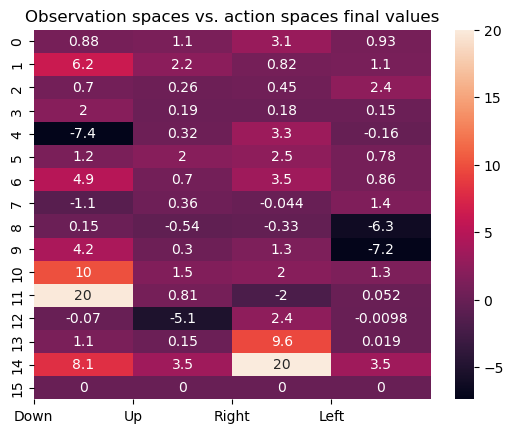

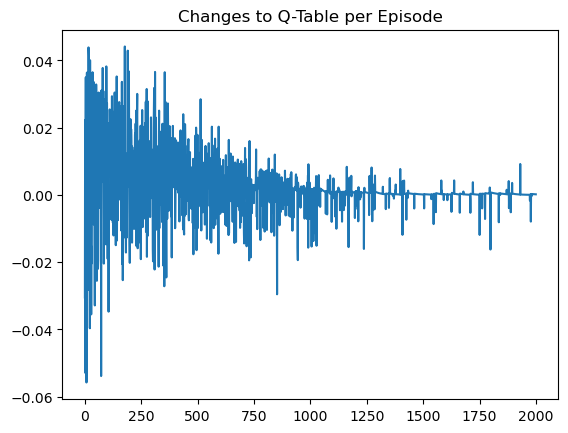

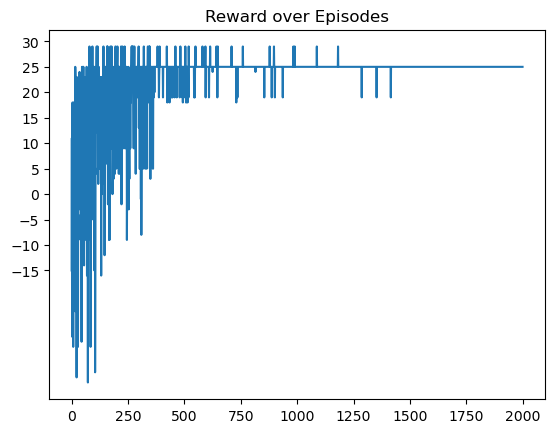

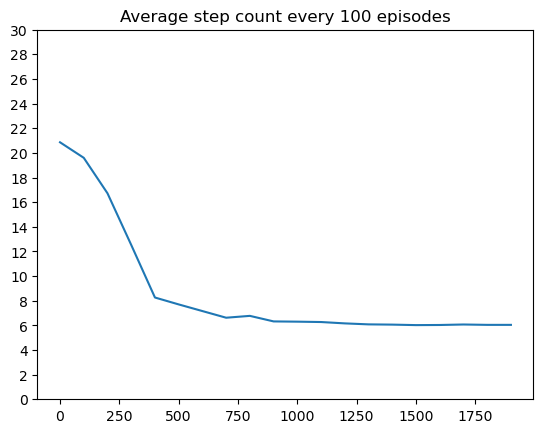

In [23]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

### PART 3 Step 1: Q-Learning

In [24]:
#Define Q-learning
def Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay):
    
    #define parameters to track reward, loss, average steps for plots
    total_reward =[]
    s_a_loss=[]
    step_count=0
    avg_steps=[]
    step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}


    #Initializing the Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    old_Q = Q
    
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        avg_loss=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            #Calculating new Q value at this state-action pair
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * np.max(Q[np.where(next_state==1)[0][0]])
            loss=alpha*(target - prediction)
            avg_loss += loss
            Q[np.where(state==1)[0][0]][action] = (Q[np.where(state==1)[0][0]][action] + loss)
            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward

            #Decrease epsilon using negative exponential function
            if epsilon > 0.01:
                epsilon =np.exp(-decay*(episode+1))

        #track data for plots
        step_count += step
        total_reward.append(ep_reward)
        s_a_loss.append(avg_loss/timestep)
        
        #print current Q-table every 100 episodes
        if (episode%100==99):
            avg_steps.append(step_count/100)
            step_count=0
            print("Episode",episode+1,"/",total_episodes,"complete")
            print("Current Q-table:\n", Q,"\n")
    
    #When all episodes are complete
    print("Done!")
    return Q, total_reward, s_a_loss, avg_steps

In [25]:
#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 2.83875608  2.22192872  3.49473663  2.42042214]
 [ 4.03616335  3.2257165   2.18611081  1.88447567]
 [ 1.99531221  1.34104147  1.12689751  3.10387418]
 [ 2.39896618  0.76790126  0.76725445  0.75696209]
 [-5.58113004  1.74818057  4.27864203  2.3870103 ]
 [ 1.17029884  3.53286032  2.35293315  2.71386287]
 [ 2.18697224  1.30051102  3.54206604  1.6897377 ]
 [ 0.20065907  1.07055586  0.75244172  2.19662929]
 [ 0.17568115  1.57364408  0.50604678 -4.77640732]
 [ 1.41869105  1.9673382   1.44678117 -4.7768783 ]
 [ 5.92149886  1.38612831 -0.84043896  0.51980412]
 [10.24650042  0.75584554 -0.38577792  0.99331825]
 [ 0.07948525 -3.782196    1.13068842  0.12279429]
 [ 0.62895054  0.46148261  5.90225159  0.091334  ]
 [ 3.47453608  1.14195774 13.18876747  1.41490107]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 4.77701032  4.2217567   5.93600096  4.43941193]
 [ 7.24217221  5.37820199  4.11718563 

Episode 1300 / 2000 complete
Current Q-table:
 [[12.98616594 13.42750963 16.17559045 12.84956624]
 [18.07421841 14.97667725 12.71611344 12.67857346]
 [ 7.69130619  5.6666344   3.7259196  15.77001903]
 [ 8.07999184  1.54783343  1.4027334   1.83521528]
 [-3.19023192  7.33405958 15.62004552  6.09752428]
 [12.83214942 14.5340633  14.58       12.75984679]
 [16.2        12.18303021 12.91484115 11.89797453]
 [11.58202697  2.22886137  3.26304223  7.52454486]
 [ 1.11382021  8.80568875  1.12622588 -4.60375619]
 [ 7.36510321  5.10718554 16.07003694 -3.56462797]
 [18.         13.3422223  11.15012081 13.17302662]
 [19.98313884  5.46069223  5.30233869  5.93576936]
 [ 0.36715515 -3.89274658  6.09455872  0.48681964]
 [ 3.25096317  2.03922076 17.4564594   1.28904543]
 [17.03247336 14.82883195 20.         13.32739435]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[12.98616594 13.44490077 15.32428853 12.93505199]
 [17.45002864 14.97667725 12.7161134

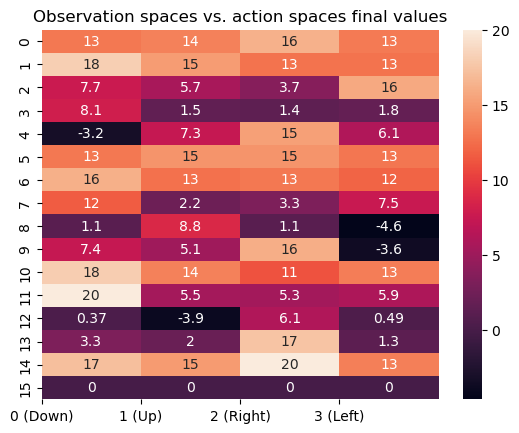

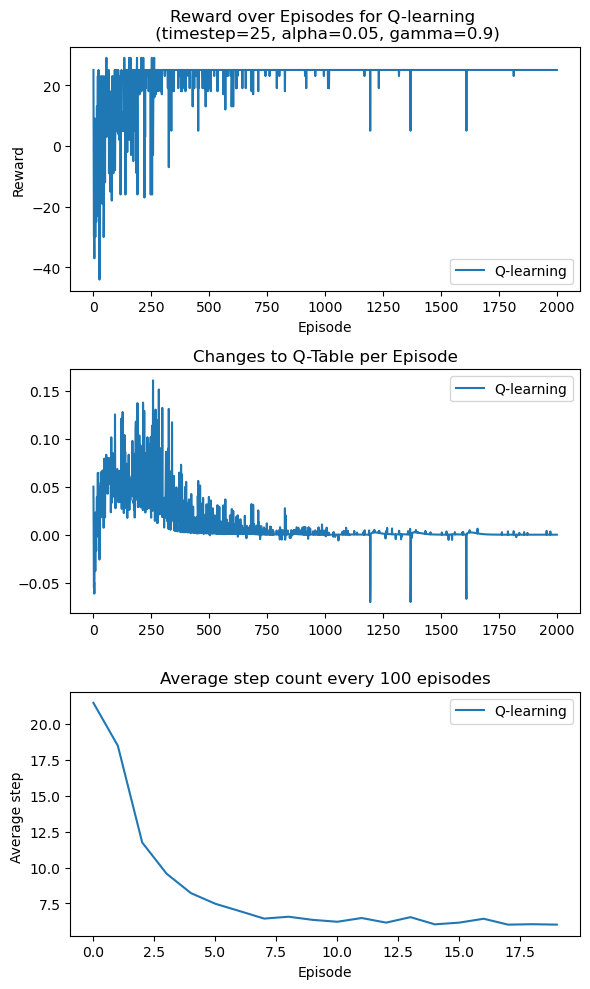

In [26]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

Done!


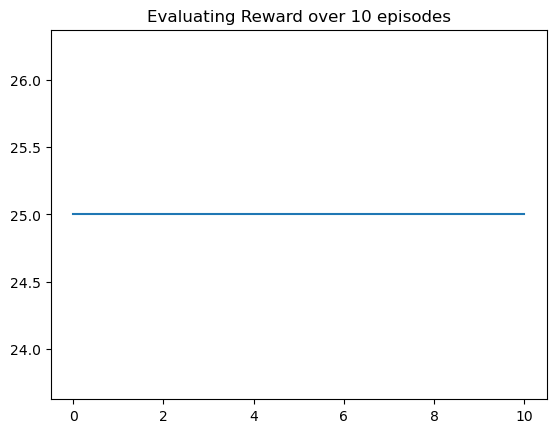

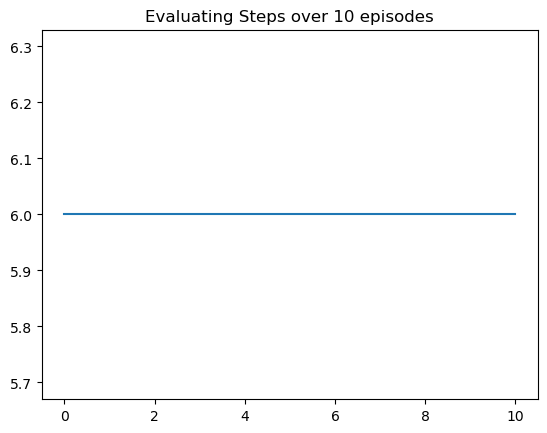

In [27]:
#Evaluate the Q-learning has converged

Qpi = Q_q
timestep=25
total_episodes = 11
epsilon = 0 #ensures greedy action is taken 100% of the time

step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

env = GameEnv(timestep)
env.reset()

reward, steps = evaluate(env, Qpi, timestep, total_episodes, epsilon)

plt.plot(reward)
plt.title(f'Evaluating Reward over 10 episodes')
plt.show()
plt.plot(steps)
plt.title("Evaluating Steps over 10 episodes")
plt.show()

## PART 3 Step 2: Tuning Parameters for Q-Learning

**Parameter #1: Number of Max Timesteps**

In [28]:
#Max timesteps: 20 timesteps
timestep=20
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 4.03311059  2.71166324  2.99888995  2.79346858]
 [ 4.446871    2.58159616  0.69501683  1.87401092]
 [ 0.81989939  0.62211603  0.3868609   1.77032533]
 [ 1.34825088  0.32831218  0.37566182  0.41255634]
 [-5.04612844  2.45106199  5.12066102  3.07633316]
 [ 1.40241843  2.77834774  1.56691007  4.02886349]
 [ 0.77627189  0.66105458  2.89101334  1.87421754]
 [-0.71908935  0.48211639  0.20569041  1.24923024]
 [ 0.10215508  2.62114584  1.02371698 -3.58093532]
 [ 1.29665998  2.26337768  0.98055371 -4.02728899]
 [ 3.34242355  0.62644247 -2.07651082  0.69424926]
 [ 7.39501181  0.45616185 -1.29335288  0.21166705]
 [ 0.02087708 -2.98927635  1.10641292  0.01956831]
 [ 0.94651612  0.94108213  4.03746612  0.19948787]
 [ 1.0406454   0.48076505  9.73315833  0.96415228]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 5.74781855  4.59485403  5.52528312  4.68638472]
 [ 6.63948265  4.44443099  2.11943298 

Episode 1300 / 2000 complete
Current Q-table:
 [[16.30149901 11.81765413  9.81401535 12.62733735]
 [14.30784578  6.66928367  4.37292993  6.04175318]
 [ 2.74162438  3.00561231  1.72791873 10.87159514]
 [ 5.41483276  1.37166347  0.7475949   0.94489963]
 [ 2.19688602 12.34592452 18.12008701 13.76945035]
 [11.93576534 10.16464994 14.58       12.13721215]
 [16.2         7.27654379 12.86177987 11.49146753]
 [ 5.03031324  2.19267194  3.15711311 13.27103958]
 [ 2.70950412 13.80871977  4.25167496 -1.86208286]
 [15.63389662  7.58916252  6.59785614 -2.15970954]
 [18.         11.258079    7.95659027 10.27087968]
 [18.92532908  3.87609008  0.3536829   2.89748899]
 [ 0.68129339 -2.93032383  8.54336583  1.22913427]
 [ 4.16237186  4.85480195 17.94128831  2.01227593]
 [15.47751586 13.4800807  20.         11.57669263]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[16.3096972  11.81765413  9.81401535 12.62733735]
 [14.13871453  6.66928367  4.3729299

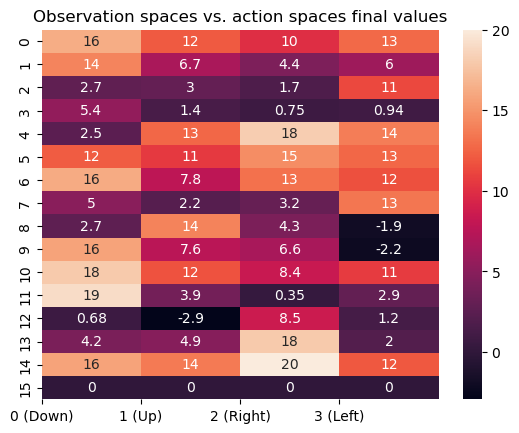

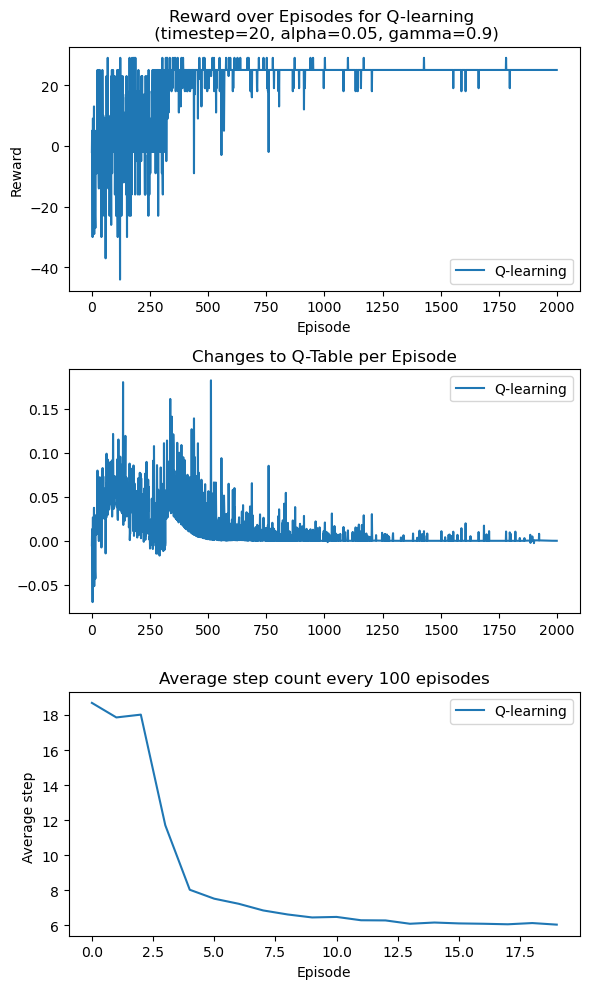

In [29]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [30]:
#Max timesteps: 15 timesteps
timestep=15
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 4.04045837e+00  2.22688594e+00  2.36950769e+00  2.44316388e+00]
 [ 3.72855578e+00  2.10274606e+00  5.47694548e-01  1.74796967e+00]
 [ 2.86254881e-01  3.38649232e-01  1.89288193e-01  1.56264185e+00]
 [ 8.69875947e-01  1.24914279e-01  1.82386011e-01  6.08308715e-02]
 [-5.08878459e+00  2.10836565e+00  5.35237789e+00  3.26921124e+00]
 [ 9.30828988e-01  2.33786592e+00  1.01882587e+00  3.60077333e+00]
 [ 1.23787331e-01  2.75310313e-01  1.25089983e+00  1.80670901e+00]
 [-8.93521125e-01  1.02986930e-01  2.07269864e-02  3.59181523e-01]
 [ 4.75521381e-02  2.57196632e+00  5.16822820e-01 -3.49445009e+00]
 [ 3.84541140e-01  1.90132275e+00  2.89232840e-01 -3.46406387e+00]
 [ 1.21415830e+00  2.08726778e-01 -1.91167899e+00  3.60906836e-01]
 [ 2.85250000e+00  3.96582117e-01 -4.54500000e-01  5.87250000e-03]
 [ 2.39865151e-02 -2.35994868e+00  4.48551430e-01  1.68753385e-02]
 [ 3.04457725e-01  3.62480518e-01  2.22319050e+00  4.29573442e-02]
 [ 1.21738352e+0

Episode 1500 / 2000 complete
Current Q-table:
 [[ 8.61801843 10.56321921 16.2697221  11.58061653]
 [18.10633191 11.70966365  6.03949601 11.16712371]
 [ 2.10596248  1.94518183  0.49554167 10.67724789]
 [ 2.00563246  0.17476082  0.31037824  0.36786723]
 [-1.60026813  6.10137539 14.03359232  6.33221843]
 [14.58       13.49247735  6.98658737  9.19182544]
 [ 4.02544801  2.74693892  3.61589906 10.72946818]
 [-1.11510521  0.39335489  0.1945204   3.0127561 ]
 [ 3.73092667  9.22374455  3.46911561 -2.99465063]
 [16.2        10.55219686 10.14164251 -0.95842939]
 [16.91756002  1.09268673 -1.34625291  2.0748401 ]
 [ 9.19279825  0.60986572 -0.4545      0.18243941]
 [ 1.51997901 -2.23502753 13.69540311  0.98602978]
 [11.9738263  10.01937579 18.          7.93016377]
 [12.69603894  9.36531131 20.         10.69792664]
 [ 0.          0.          0.          0.        ]] 

Episode 1600 / 2000 complete
Current Q-table:
 [[ 8.61801843 10.56321921 16.30912331 11.58061653]
 [18.12190724 11.70966365  6.0394960

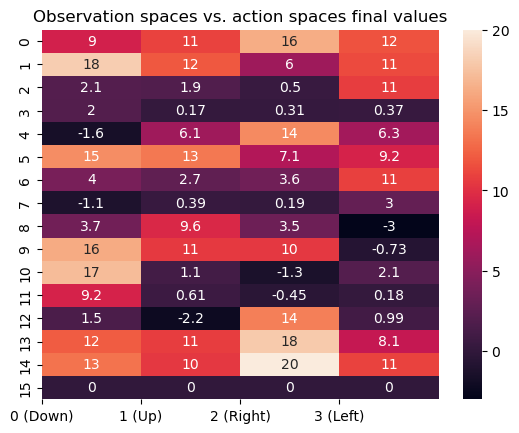

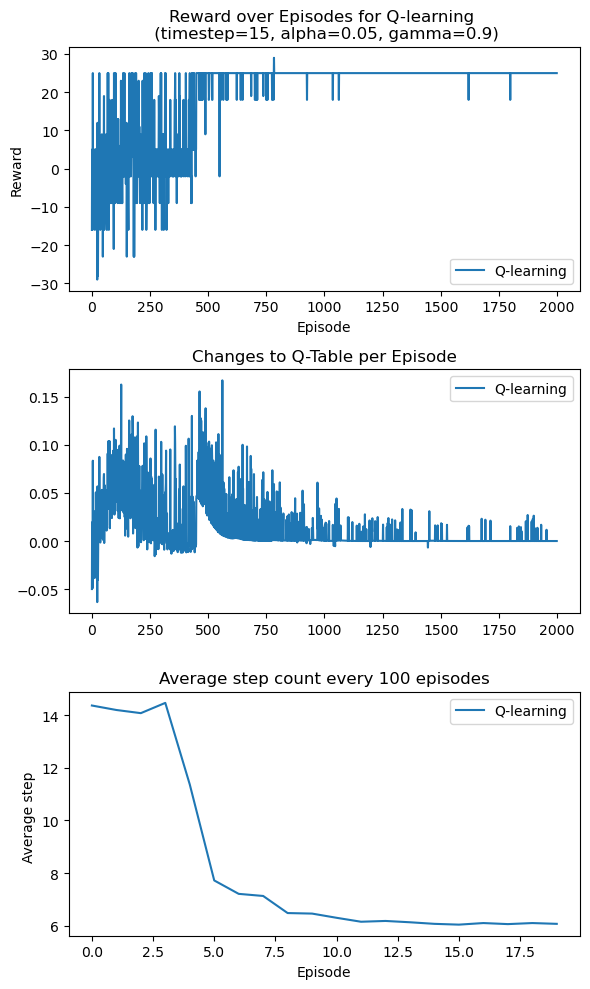

In [31]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [32]:
#Max timesteps: 10 timesteps
timestep=10
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.46232688e+00  2.33547382e+00  1.88470505e+00  2.13873311e+00]
 [ 3.43171155e+00  1.15001252e+00  3.99610191e-01  1.21253042e+00]
 [ 4.27857965e-01  8.99204029e-02  2.21793566e-01  1.19845799e+00]
 [ 8.72782005e-01  4.78251902e-02  1.89249702e-01  1.04497762e-01]
 [-4.96409696e+00  1.77949098e+00  4.48273990e+00  2.00075975e+00]
 [ 4.24099132e-01  1.16794544e+00  5.95391563e-01  2.74939299e+00]
 [ 1.25578469e-01  5.87740075e-02  1.36015593e+00  1.95965578e-01]
 [-1.84830213e+00  1.70020241e-01  1.29493841e-02  2.78192012e-01]
 [ 2.10749515e-03  1.83408272e+00  1.23558522e-01 -2.79137090e+00]
 [ 5.19529128e-02  1.31648800e+00  8.87414656e-02 -2.11597795e+00]
 [ 9.64245435e-01  1.14565185e-01 -2.09876127e+00  8.53812036e-02]
 [ 2.85250000e+00  3.90006698e-01  0.00000000e+00  2.14510855e-02]
 [ 1.30523008e-03 -1.44499393e+00  5.23698140e-02  1.86899824e-03]
 [ 2.19644283e-02  6.16998841e-02  5.51443486e-01  2.35664163e-03]
 [ 5.12861611e-0

Episode 1100 / 2000 complete
Current Q-table:
 [[ 5.4890654   5.52945909  8.49940127  5.47358228]
 [ 9.89278995  5.87223754  4.6868726   5.53849992]
 [ 1.27957609  1.22844763  0.53719165  6.2545819 ]
 [ 2.28354621  0.1173261   0.2280748   0.212623  ]
 [-0.30920523  5.79499601  6.20564829  5.78273671]
 [ 5.49792098  5.51789395  5.56201272  5.49533324]
 [ 3.66680517  2.9695336   6.01694925  4.0152737 ]
 [-0.61507986  0.66041205  1.61200722  5.58549907]
 [ 0.18208063  6.69144063  3.42797737 -2.32378957]
 [ 1.35404967  5.54318316  2.18823584 -1.64377918]
 [ 8.63294716  0.69605185 -1.8000712   1.04465501]
 [10.7341754   0.83932426 -0.1716375   0.21517068]
 [ 0.0671795  -1.87899875  1.15826182  0.06872941]
 [ 0.85329609  0.43134758  6.03728136  0.09250763]
 [ 1.54408573  0.11626316 16.3194818   0.91096916]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 5.50757515  5.59190842  6.06778409  5.47358228]
 [ 6.54062072  5.89920835  4.8212611

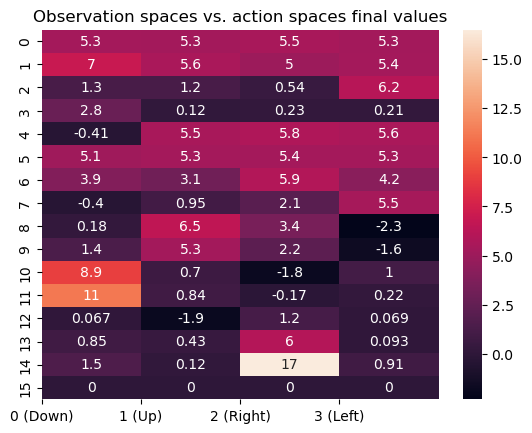

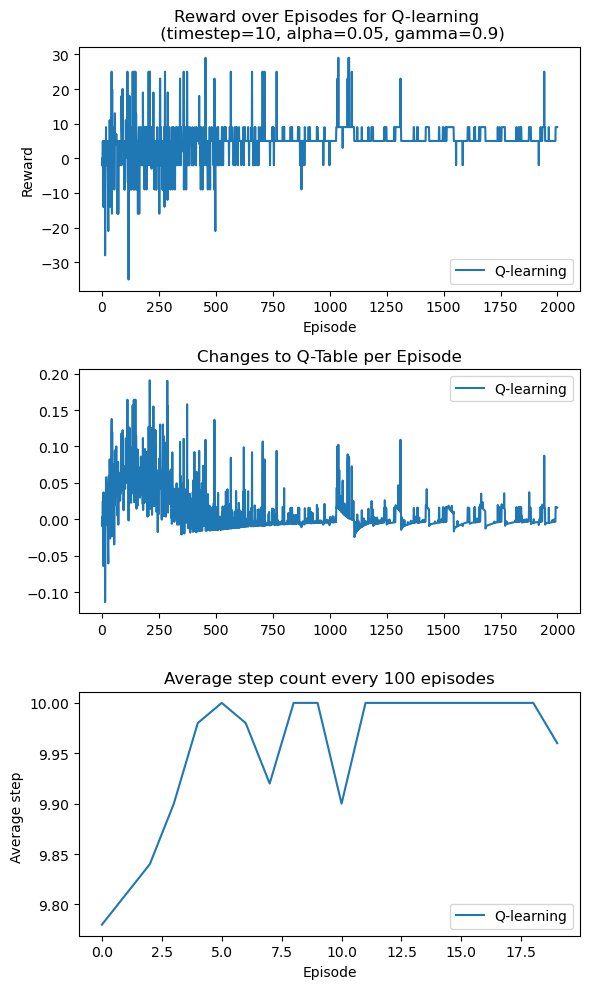

In [33]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

**Parameter #2: Value of Gamma**

In [34]:
#Value of Gamma: 1.0
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 1
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 4.40891021  4.15986895  5.55118483  4.24751054]
 [ 6.60157014  4.84856414  2.96429123  3.85782498]
 [ 1.66466546  1.52305801  0.9394687   4.55259548]
 [ 1.99918245  0.61177486  0.80348153  1.12060403]
 [-4.204094    3.40844272  6.03365095  2.47549385]
 [ 2.61485335  5.74048022  2.61015783  3.76036998]
 [ 2.81470135  2.11033856  3.634558    1.88026013]
 [ 0.67549303  0.67335965  0.69309036  2.3963951 ]
 [ 0.15148734  2.43264975  0.91287514 -3.87317082]
 [ 1.04076791  3.9074415   1.94096308 -4.05796622]
 [ 5.76232103  1.06603154  1.64916914  0.68908608]
 [13.18876747  1.19581115  0.39543258  0.11839519]
 [ 0.13180125 -3.63771999  0.99152167  0.19670638]
 [ 0.58760511  0.76148974  3.84832661  0.19542341]
 [ 4.58346022  0.77713285 12.05571363  0.67235388]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 9.07028922  9.78768164 13.85302481  9.35483771]
 [14.92181909 12.4209101  10.18968361 

Episode 1100 / 2000 complete
Current Q-table:
 [[ 52.52021875  71.07378098 118.23918262  57.447935  ]
 [120.54996967 104.75895842  91.23688557 100.47295786]
 [ 28.54280837  27.14043065  10.74208235 103.77360915]
 [ 19.42777179   3.22804119   4.65318937   7.84614227]
 [  7.22513066  30.93861501 101.58528693  28.03293876]
 [ 88.01670234 120.43116504  84.09831181  87.52954804]
 [ 19.74860514  25.27027343  20.71468178  99.19931606]
 [  6.34140543   3.62908651   5.42185981  39.03538445]
 [  1.59056148  36.0665603    3.09225941  -1.5314224 ]
 [ 13.06653913 101.91825735  15.26324049   5.08437237]
 [ 19.94500135  10.35422341   7.53477497  13.06284549]
 [ 18.20510336   2.76092769   2.74003501   3.87630124]
 [  0.40062823  -2.10237352   7.97763966   1.05555768]
 [  5.52410603   5.86150973  18.41712371   2.70355933]
 [ 15.91532217  11.69053937  19.99295     11.21053351]
 [  0.           0.           0.           0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 52.52021875  73.8644

Episode 2000 / 2000 complete
Current Q-table:
 [[ 57.80189925  92.75055769 233.20554644  72.05476373]
 [235.64818567 175.40639168 136.1284686  183.06188349]
 [ 28.54280837  31.85002053  10.74208235 177.74124305]
 [ 19.42777179   3.22804119   4.65318937   7.84614227]
 [  7.22513066  30.93861501 174.79866828  28.03293876]
 [121.96962224 235.53904199 118.94995474 136.06944718]
 [ 19.74860514  25.27027343  23.08417181 156.0284016 ]
 [  6.34140543   3.62908651   5.42185981  46.77979384]
 [  1.59056148  36.0665603    3.09225941  -1.5314224 ]
 [ 13.06653913 161.76264558  15.49732853   5.08437237]
 [ 19.94967634  10.35422341   7.53477497  13.06284549]
 [ 18.20510336   2.76092769   2.74003501   3.87630124]
 [  0.40062823  -2.10237352   7.97763966   1.05555768]
 [  5.52410603   5.86150973  18.41712371   2.70355933]
 [ 15.91532217  12.10338234  19.9933025   11.21053351]
 [  0.           0.           0.           0.        ]] 

Done!


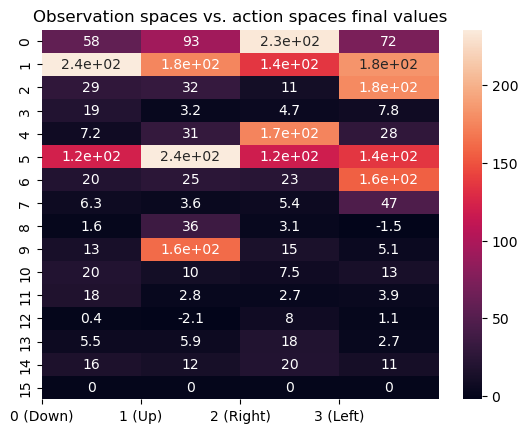

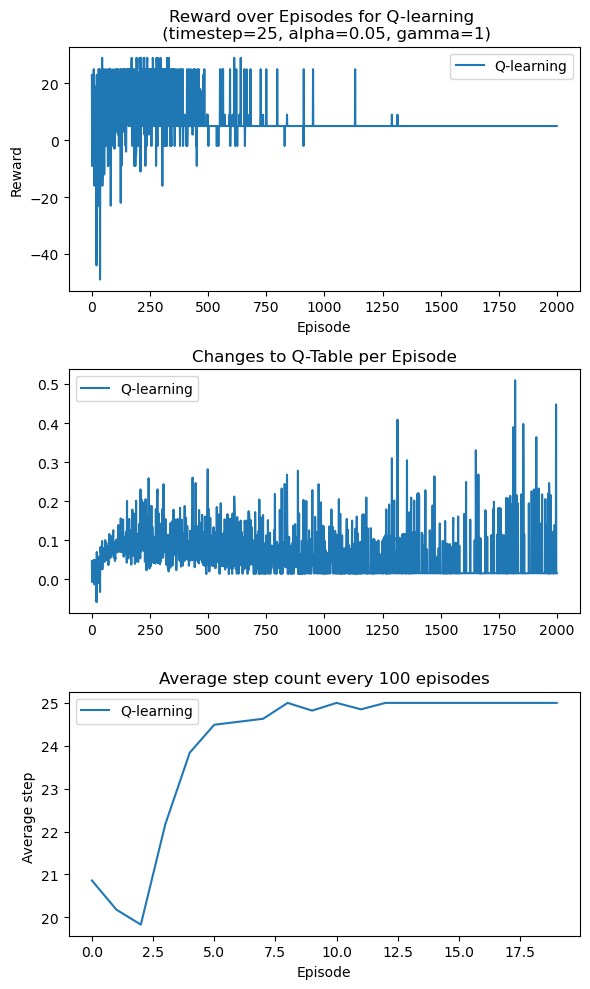

In [35]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [36]:
#Value of Gamma: 0.7
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.7
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 1.49622038  1.21423517  2.03594187  1.14572885]
 [ 2.95279212  1.96718389  1.01058325  1.26997008]
 [ 0.67640861  0.68849107  0.67444983  1.84584899]
 [ 1.81603595  0.58086921  0.47033876  0.19350071]
 [-5.94685943  0.92016297  2.94817572  1.11556541]
 [ 0.90961047  2.03672382  0.994844    1.51212193]
 [ 1.42614398  0.42776773  2.31215358  1.58602146]
 [-1.02434443  0.55340092  0.18611472  0.8230755 ]
 [ 0.57511694  0.9277122   0.53363604 -4.65621712]
 [ 2.87008303  1.32674984  1.1129392  -4.72354749]
 [ 4.97924983  0.42830835 -0.95097372  0.5128186 ]
 [10.24650042  0.61635431 -0.79908231  0.22948829]
 [ 0.29728609 -4.48865399  2.30675513  0.27339914]
 [ 1.41164365  0.69988491  7.28076974  0.53993439]
 [ 3.99985136  1.08271838 14.72959811  1.82682695]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 2.23478395  1.57995108  4.0390185   1.7175591 ]
 [ 6.40756854  2.74752211  1.47802234 

Episode 1400 / 2000 complete
Current Q-table:
 [[ 4.33691047  4.37457137  6.83123898  4.40393998]
 [ 9.78711536  6.41570997  3.70719593  4.23511844]
 [ 2.51456062  1.44582588  1.37781304  6.23331003]
 [ 3.10859374  0.99658585  1.00829668  0.79577683]
 [-5.36309064  2.96906907  6.5922047   2.62516322]
 [ 6.86        6.23659374  5.83319885  4.29570897]
 [ 9.51596447  1.61887277  4.09742576  2.65891222]
 [ 1.59737258  1.08859711  0.69233502  3.54780836]
 [ 2.82274074  4.40815073  2.64487453 -5.0832206 ]
 [ 9.8         4.53851625  8.88948812 -4.2763225 ]
 [13.99684712  3.48002847  2.11023802  4.47916366]
 [15.70722472  1.90455788 -0.04354966  1.81447252]
 [ 1.34190418 -4.68998761  9.54171151  1.82367811]
 [ 9.48976198  6.29702825 14.          5.99497172]
 [13.54797594  9.50623261 20.          9.15098497]
 [ 0.          0.          0.          0.        ]] 

Episode 1500 / 2000 complete
Current Q-table:
 [[ 4.33691047  4.37457137  6.86089676  4.40393998]
 [ 9.80191188  6.43772704  3.7071959

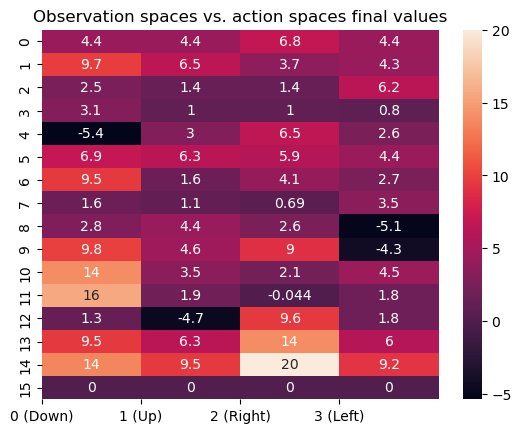

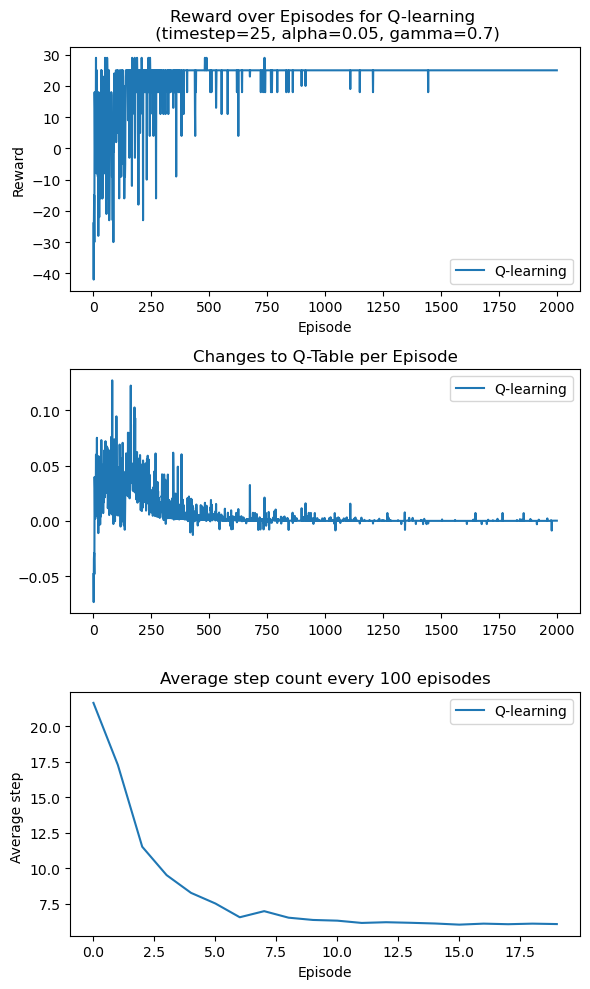

In [37]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [38]:
#Value of Gamma: 0.5
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.5
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 9.14216076e-01  5.88363538e-01  1.37641680e+00  5.45334458e-01]
 [ 2.15860749e+00  1.24699415e+00  4.26667277e-01  6.00968716e-01]
 [ 6.42247077e-01  3.24062652e-01  5.15166165e-01  1.14687946e+00]
 [ 1.16332957e+00  5.50083170e-01  5.44438712e-01  2.24401601e-01]
 [-6.18832350e+00  4.13307624e-01  2.05657897e+00  8.42253782e-01]
 [ 3.73930487e-01  1.32124792e+00  8.10915475e-01  9.02756280e-01]
 [ 2.65712354e-01  3.04634179e-01  2.36552235e+00  6.20360591e-01]
 [-1.44556689e+00  5.91750832e-01  1.63858408e-01  5.17743569e-01]
 [ 1.55407499e-02  6.62548615e-01  1.70377452e-01 -4.85663164e+00]
 [ 3.73249320e-01  8.55563930e-01  2.69513175e-01 -3.96695732e+00]
 [ 2.29129005e+00  2.71023791e-01 -1.54598955e+00  1.16436553e-01]
 [ 1.31887675e+01  5.16477688e-01 -1.27468919e+00  1.83446333e-01]
 [ 5.02236901e-03 -3.52517399e+00  1.45082464e-01  6.03540884e-03]
 [ 1.85652373e-01  7.40114753e-02  2.51472730e+00  4.94059228e-03]
 [ 7.27363202e-0

Episode 1400 / 2000 complete
Current Q-table:
 [[ 1.59341235  1.19684833  2.79075554  1.23943302]
 [ 5.90668382  2.51563469  1.23795496  1.32738838]
 [ 1.30477532  0.69511407  0.70895341  2.78225222]
 [ 2.65121783  0.58259091  0.55904444  0.33907282]
 [-6.48528887  0.80071036  4.00448019  1.18508449]
 [ 2.27572354  2.49605534  2.5         1.55348293]
 [ 5.          1.18884426  4.98392284  1.23280308]
 [ 3.5670859   0.66706499  0.54029883  1.42337995]
 [ 0.17076247  1.18824658  0.32726853 -5.49412875]
 [ 2.20221438  1.08588624  4.97325251 -5.68215397]
 [10.          2.20127249  3.54368027  2.24150658]
 [19.96360569  1.29223991  1.13602005  2.37335676]
 [ 0.05295282 -3.82798694  2.309241    0.05966858]
 [ 1.5725846   0.76999532  9.75558209  0.36988972]
 [ 8.98473985  4.60989662 20.          4.35553685]
 [ 0.          0.          0.          0.        ]] 

Episode 1500 / 2000 complete
Current Q-table:
 [[ 1.59341235  1.19684833  3.18184205  1.23943302]
 [ 6.42617514  2.54956989  1.2379549

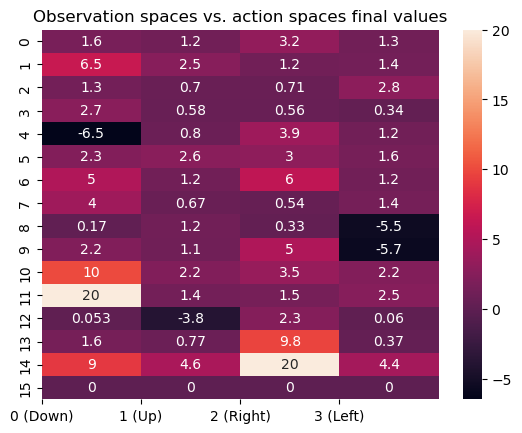

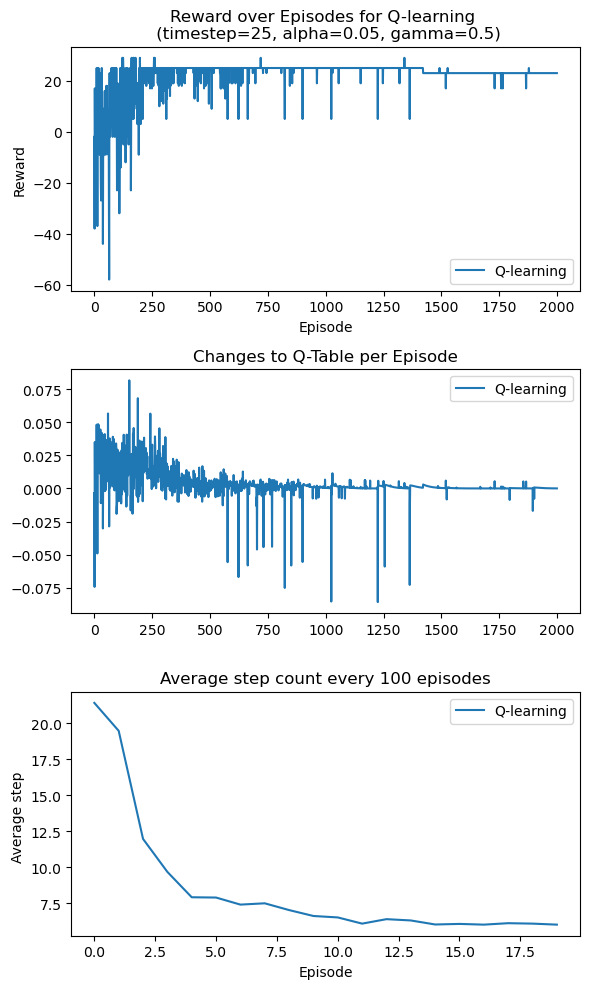

In [39]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

## Comparing SARSA and Q-Learning Results

In [40]:
#Comparing SARSA and Q-Learning
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#SARSA
Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)


#Q-Learning
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 0.11543498  0.31211452  0.98155428  0.35311803]
 [ 2.04997507  0.83895153  0.20376857  0.28004307]
 [ 0.31424654  0.11299481  0.14899031  0.78489927]
 [ 0.79925204  0.16807444  0.0843311   0.07221254]
 [-7.67552274  0.30590768  1.89535909 -0.18717549]
 [-1.0234043   0.95644112  0.51263585 -1.2379186 ]
 [ 0.06052951  0.17202233  1.61961209  0.69953382]
 [-2.79494252  0.14501448 -0.55043528  0.34108087]
 [-0.55947897 -0.67130645 -0.89484027 -5.59140917]
 [ 0.08372351  0.78222609 -0.29104079 -5.98081849]
 [ 2.02061628  0.19667621 -3.1728636  -0.08639496]
 [10.24650042  0.63047386 -0.98460458 -0.25892358]
 [-0.50907032 -4.96029011  0.23834815 -0.17880848]
 [ 0.02309621 -1.12118478  1.41579247 -0.77608561]
 [ 0.96648799 -0.21991741 12.83028155  0.03122678]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[-0.03931483  0.91289544  1.45447727  0.92166157]
 [ 2.53221184  1.586612    0.75533194 

Episode 1300 / 2000 complete
Current Q-table:
 [[ 6.30457638  7.52507041 15.96619727  8.3540322 ]
 [17.85022488  9.63214952  4.33200951  8.28163505]
 [ 1.33033364  0.71323633  0.72447867  9.24540129]
 [ 2.8122052   0.42914082  0.39059978  0.37233047]
 [-7.55929705  2.31996655 12.92569365  2.61000193]
 [14.37169602 11.56353372  5.58989291  6.63907782]
 [ 3.15243007  0.82313051  8.92148137  1.88625939]
 [ 8.08274477  0.69800638  1.28625651  1.7533645 ]
 [-0.37242649  6.06749412 -0.57213262 -6.7070613 ]
 [16.07931883  6.71217624  8.93606898 -4.70182664]
 [16.44636711  1.20092849 -0.72622701  1.2642631 ]
 [19.76933396  1.71016423  1.34513481  2.1822832 ]
 [-0.29856285 -5.75361605 11.20613822  0.64410456]
 [12.33991369  8.86547997 17.997263    4.99482002]
 [12.19162553  9.99331898 20.         11.72867371]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[ 6.57100377  7.85706002 16.03128459  8.3540322 ]
 [17.63702288  9.95559964  4.5314520

Episode 300 / 2000 complete
Current Q-table:
 [[ 8.10727637  7.53605498 11.91281933  6.8134282 ]
 [14.00755872  9.13625731  5.787207    6.85043489]
 [ 6.2396936   4.39981497  4.93260468  8.6899174 ]
 [10.3226823   2.93265544  2.67919374  2.53362045]
 [-3.94417372  5.42041207 12.07771224  4.96972521]
 [ 4.86753972  9.23940122 12.32696823  7.4220248 ]
 [ 9.63462755  4.88648581 13.93017091  7.93557568]
 [11.92509913  7.02732653  7.66467839  8.72352138]
 [ 0.72780853  5.73596485  2.07050047 -4.00718309]
 [ 4.79402708  7.6062231   4.07685318 -3.84098349]
 [14.951901    5.72092534  5.57013941  1.64004686]
 [19.97820938  7.43235122  6.62535405  8.03682252]
 [ 0.54086482 -3.29956061  3.91227014  0.62381262]
 [ 2.41572326  1.13736104 12.05463259  0.96944316]
 [ 8.99373935  5.33108105 19.0301095   4.6060504 ]
 [ 0.          0.          0.          0.        ]] 

Episode 400 / 2000 complete
Current Q-table:
 [[10.09355115  9.3557212  13.9219198   9.52617996]
 [15.88149348 11.13991467  7.27584395 

Episode 1300 / 2000 complete
Current Q-table:
 [[11.8857899  12.44464856 16.2229729  12.2189467 ]
 [18.05809356 13.69930894 11.60317319 12.11880497]
 [ 7.1799866   4.64478608  6.17513361 15.10327379]
 [11.10022722  2.93265544  3.36616298  3.31093574]
 [-3.20202586  7.79250266 14.64319768  7.7910838 ]
 [ 9.23319057 13.98985711 14.58       12.24943099]
 [16.2        10.63314658 14.38173731 11.94732843]
 [12.          9.21665604 10.22073999 13.26758695]
 [ 0.72780853  7.86530941  2.07050047 -4.00718309]
 [ 5.80618628 11.82949929  5.67497628 -3.49226998]
 [18.          8.91292921  7.27280528  3.98984145]
 [20.          9.39002062  9.86440979 13.41154024]
 [ 0.54086482 -3.29956061  4.2933623   0.76867414]
 [ 2.41572326  1.95878101 14.86198749  1.09702316]
 [13.73036718  9.65703311 20.          8.15425396]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[11.9504443  12.55258499 16.30739119 12.2189467 ]
 [18.12160173 13.69930894 11.6031731

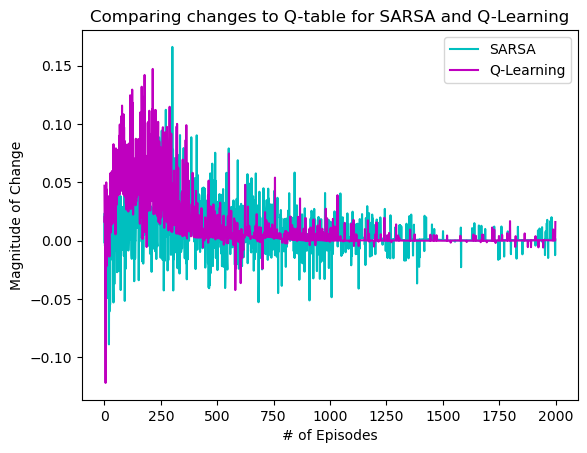

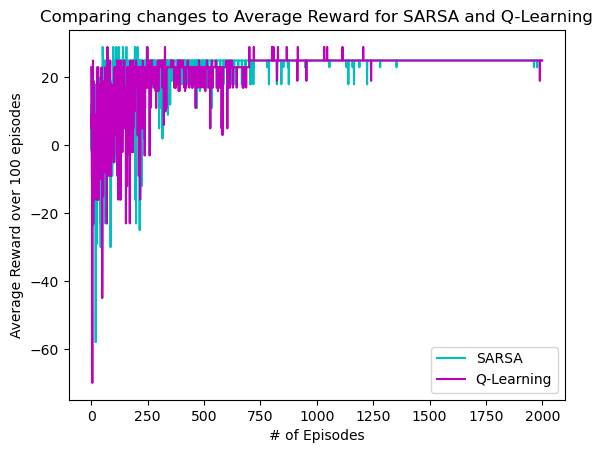

In [41]:
#plotting comparisons
plt.plot(loss, color='c', label='SARSA')
plt.plot(loss_q, color='m', label='Q-Learning')
  
plt.xlabel("# of Episodes")
plt.ylabel("Magnitude of Change")
plt.title("Comparing changes to Q-table for SARSA and Q-Learning")
plt.legend()
plt.show()

plt.plot(reward, color='c', label='SARSA')
plt.plot(reward_q, color='m', label='Q-Learning')
  
plt.xlabel("# of Episodes")
plt.ylabel("Average Reward over 100 episodes")
plt.title("Comparing changes to Average Reward for SARSA and Q-Learning")
plt.legend()
plt.show()


References
1. RL textbook: http://incompleteideas.net/book/RLbook2020.pdf
2. Random Agent class demo
3. Q-learning vs SARSA (reference only): https://towardsdatascience.com/q-learning-and-sasar-with-python-3775f86bd178
4. Matplotlib documentation: https://matplotlib.org/stable/index.html

